In [47]:
import numpy as np
import pandas as pd
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.model_selection import GridSearchCV

In [48]:
x_train_df = pd.read_csv('data_reviews/x_train.csv')
y_train_df = pd.read_csv('data_reviews/y_train.csv')
x_test_df = pd.read_csv('data_reviews/x_test.csv')
X = pd.concat([x_train_df, x_test_df], ignore_index=True ,axis=0)
# x_train_df.head()
X['text']

0       Oh and I forgot to also mention the weird colo...
1                            THAT one didn't work either.
2                                      Waste of 13 bucks.
3       Product is useless, since it does not have eno...
4       None of the three sizes they sent with the hea...
                              ...                        
2995      This is a great restaurant at the Mandalay Bay.
2996    I could care less... The interior is just beau...
2997    The only consistent thread holding the series ...
2998    My side Greek salad with the Greek dressing wa...
2999    However, my recent experience at this particul...
Name: text, Length: 3000, dtype: object

### Text preprocessing

#### Lowercase

In [49]:
x_train_df['text'] = x_train_df['text'].str.lower()
x_train_df['text'].head()
x_test_df['text'] = x_test_df['text'].str.lower()
x_test_df['text'].head()
X['text'] = X['text'].str.lower()
X['text']

0       oh and i forgot to also mention the weird colo...
1                            that one didn't work either.
2                                      waste of 13 bucks.
3       product is useless, since it does not have eno...
4       none of the three sizes they sent with the hea...
                              ...                        
2995      this is a great restaurant at the mandalay bay.
2996    i could care less... the interior is just beau...
2997    the only consistent thread holding the series ...
2998    my side greek salad with the greek dressing wa...
2999    however, my recent experience at this particul...
Name: text, Length: 3000, dtype: object

#### Remove number


In [50]:
X['text'] = X['text'] .str.replace('\d+', '')
# df.Name = df.Name.str.replace('\d+', '')

In [51]:
X['text']

0       oh and i forgot to also mention the weird colo...
1                            that one didn't work either.
2                                        waste of  bucks.
3       product is useless, since it does not have eno...
4       none of the three sizes they sent with the hea...
                              ...                        
2995      this is a great restaurant at the mandalay bay.
2996    i could care less... the interior is just beau...
2997    the only consistent thread holding the series ...
2998    my side greek salad with the greek dressing wa...
2999    however, my recent experience at this particul...
Name: text, Length: 3000, dtype: object

#### Expand Contractions

In [52]:
import contractions

In [53]:
X['text'] = X['text'].apply(lambda x: contractions.fix(x) )

In [54]:
X['text']

0       oh and i forgot to also mention the weird colo...
1                           that one did not work either.
2                                        waste of  bucks.
3       product is useless, since it does not have eno...
4       none of the three sizes they sent with the hea...
                              ...                        
2995      this is a great restaurant at the mandalay bay.
2996    i could care less... the interior is just beau...
2997    the only consistent thread holding the series ...
2998    my side greek salad with the greek dressing wa...
2999    however, my recent experience at this particul...
Name: text, Length: 3000, dtype: object

#### Remove stop words

In [55]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\黎廷威\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\黎廷威\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
neg_words = ['don', "don't",'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 
             'hasn', "hasn't",'isn', "isn't", "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', 
             "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",
             'no', 'nor', 'not', "haven't", 'mightn']

In [57]:
temp = [x for x in stop_words if x not in neg_words]
# temp

In [58]:
X['text'] = X['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (temp)]))

In [59]:
X['text']

0        oh forgot also mention weird color effect phone.
1                                    one not work either.
2                                            waste bucks.
3       product useless, since not enough charging cur...
4          none three sizes sent headset would stay ears.
                              ...                        
2995                       great restaurant mandalay bay.
2996               could care less... interior beautiful.
2997    consistent thread holding series together amaz...
2998    side greek salad greek dressing tasty, pita hu...
2999    however, recent experience particular location...
Name: text, Length: 3000, dtype: object

#### remove punctation

In [60]:
from nltk.tokenize import RegexpTokenizer
X['text'] = X['text'].str.replace('[^\w\s]','')

#### Toeknize

In [61]:
from nltk import word_tokenize
X['text'] = X['text'].apply(lambda x: word_tokenize(x))
X['text']

0       [oh, forgot, also, mention, weird, color, effe...
1                                [one, not, work, either]
2                                          [waste, bucks]
3       [product, useless, since, not, enough, chargin...
4       [none, three, sizes, sent, headset, would, sta...
                              ...                        
2995                   [great, restaurant, mandalay, bay]
2996             [could, care, less, interior, beautiful]
2997    [consistent, thread, holding, series, together...
2998    [side, greek, salad, greek, dressing, tasty, p...
2999    [however, recent, experience, particular, loca...
Name: text, Length: 3000, dtype: object

#### Porter Stem

In [62]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
for i in range(len(X['text'])):
    for j in range(len(X['text'][i])):
        X['text'][i][j] = ps.stem(X['text'][i][j])

#### Remove low frequency words

In [63]:
text = []
for i in range(len(X['text'])):
    for j in range(len(X['text'][i])):
        text.append(X['text'][i][j])
        
from nltk import FreqDist
freq = FreqDist(text)
freq

FreqDist({'not': 605, 'good': 228, 'great': 208, 'movi': 208, 'film': 184, 'phone': 174, 'one': 147, 'like': 142, 'work': 141, 'time': 136, ...})

In [64]:
low_freq_words = []
for key, values in freq.items():
    if values <= 1:
        low_freq_words.append(key)
len(low_freq_words)

2276

In [65]:
for i in range(len(X['text'])):
    X['text'][i] = " ".join(X['text'][i])
X['text'] = X['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (low_freq_words)]))
X['text']

0         oh forgot also mention weird color effect phone
1                                     one not work either
2                                               wast buck
3       product useless sinc not enough charg current ...
4                  none three size headset would stay ear
                              ...                        
2995                                    great restaur bay
2996                               could care less beauti
2997    consist hold seri togeth amaz perform two quie...
2998    side greek salad greek dress tasti pita hummu ...
2999        howev recent experi particular locat not good
Name: text, Length: 3000, dtype: object

### TF-IDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
X = v.fit_transform(X['text'])
print(x.toarray())
X.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(3000, 1835)

In [67]:
x = X[:2400, :]
x.shape

(2400, 1835)

### Train test split

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_train_df, test_size=0.4)

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr_clf = LogisticRegression(random_state=0).fit(x_train, y_train)
lr_clf.score(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8270833333333333

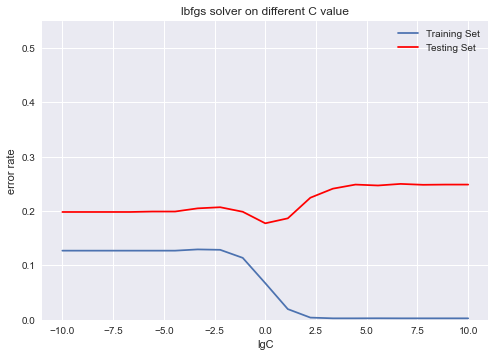

In [71]:
C_grid = np.logspace(-10, 10, 19)

train_score_list=[]
test_score_list=[]
for C in C_grid:
    lr_clf = LogisticRegression(C=C,random_state=0, solver='lbfgs').fit(x, y_train_df)
    cv_results = cross_validate(lr_clf, x, y_train_df, cv=5, return_train_score=True)
 #     score = cross_val_score(lr_clf ,x, y_train_df, cv=5).mean()
    train_score_list.append(cv_results['train_score'].mean())
    test_score_list.append(cv_results['test_score'].mean())
train_error_list = 1 - np.array(train_score_list)
test_error_list = 1 - np.array(test_score_list)

lg_C_grid = np.log10(C_grid)
plt.plot(lg_C_grid, train_error_list, label='Training Set')
plt.plot(lg_C_grid, test_error_list, label='Testing Set', color='red')
plt.xlabel('lgC')
plt.ylabel('error rate')
plt.title('lbfgs solver on different C value')
plt.ylim((0,0.55))
plt.legend()

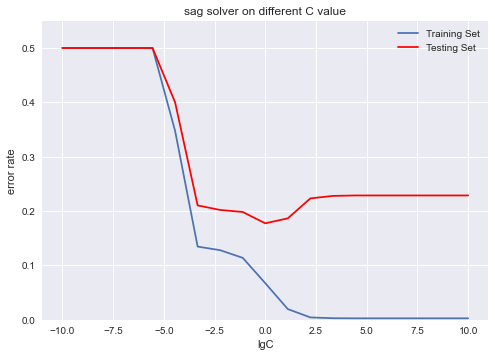

In [72]:
train_score_list=[]
test_score_list=[]
for C in C_grid:
    lr_clf = LogisticRegression(C=C,random_state=0, solver='sag').fit(x_train, y_train)
    cv_results = cross_validate(lr_clf, x, y_train_df, cv=5, return_train_score=True)
 #     score = cross_val_score(lr_clf ,x, y_train_df, cv=5).mean()
    train_score_list.append(cv_results['train_score'].mean())
    test_score_list.append(cv_results['test_score'].mean())

train_error_list = 1 - np.array(train_score_list)
test_error_list = 1 - np.array(test_score_list)
    
lg_C_grid = np.log10(C_grid)
plt.plot(lg_C_grid, train_error_list, label='Training Set')
plt.plot(lg_C_grid, test_error_list, label='Testing Set', color='red')
plt.ylim((0,0.55))
plt.xlabel('lgC')
plt.ylabel('error rate')
plt.title('sag solver on different C value')
plt.legend()  

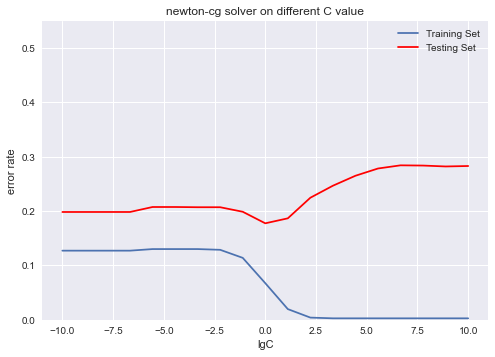

In [73]:
train_score_list=[]
test_score_list=[]
for C in C_grid:
    lr_clf = LogisticRegression(C=C,random_state=0, solver='newton-cg').fit(x, y_train_df)
    cv_results = cross_validate(lr_clf, x, y_train_df, cv=5, return_train_score=True)
 #     score = cross_val_score(lr_clf ,x, y_train_df, cv=5).mean()
    train_score_list.append(cv_results['train_score'].mean())
    test_score_list.append(cv_results['test_score'].mean())

train_error_list = 1 - np.array(train_score_list)
test_error_list = 1 - np.array(test_score_list)    
    
lg_C_grid = np.log10(C_grid)
plt.plot(lg_C_grid, train_error_list, label='Training Set')
plt.plot(lg_C_grid, test_error_list, label='Testing Set', color='red')
plt.ylim((0,0.55))
plt.xlabel('lgC')
plt.ylabel('error rate')
plt.title('newton-cg solver on different C value')
plt.legend()   

In [74]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver':('sag', 'lbfgs', 'newton-cg'), 'C':C_grid}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(x, y_train_df)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.29154967e-09, 1.66810054e-08, 2.15443469e-07,
       2.78255940e-06, 3.59381366e-05, 4.64158883e-04, 5.99484250e-03,
       7.74263683e-02, 1.00000000e+00, 1.29154967e+01, 1.66810054e+02,
       2.15443469e+03, 2.78255940e+04, 3.59381366e+05, 4.64158883e+06,
       5.99484250e+07, 7.74263683e+08, 1.00000000e+10]),
                         'solver': ('sag', 'lbfgs', 'newton-cg')})

In [75]:
print(clf.best_score_)
print(clf.best_params_)

0.8225
{'C': 1.0, 'solver': 'sag'}


###  MLP

In [76]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=2, alpha=0.001 ,activation='logistic', max_iter=200, learning_rate='adaptive', random_state=0).fit(x_train, y_train)
mlp.score(x_test, y_test)

0.7447916666666666

In [78]:
hidden_layers_list = np.arange(1, 10)

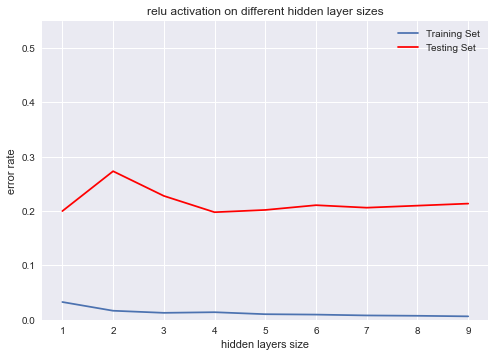

In [79]:
train_score_list=[]
test_score_list=[]
for h in hidden_layers_list:
    mlp = MLPClassifier(hidden_layer_sizes=h,random_state=0, activation='relu', learning_rate='adaptive', max_iter=200).fit(x, y_train_df)
    cv_results = cross_validate(mlp, x, y_train_df, cv=5, return_train_score=True)
 #     score = cross_val_score(lr_clf ,x, y_train_df, cv=5).mean()
    train_score_list.append(cv_results['train_score'].mean())
    test_score_list.append(cv_results['test_score'].mean())
train_error_list = 1 - np.array(train_score_list)
test_error_list = 1 - np.array(test_score_list)

plt.plot(hidden_layers_list, train_error_list, label='Training Set')
plt.plot(hidden_layers_list, test_error_list, label='Testing Set', color='red')
plt.xlabel('hidden layers size')
plt.ylabel('error rate')
plt.title('relu activation on different hidden layer sizes')
plt.ylim((0,0.55))
plt.legend()


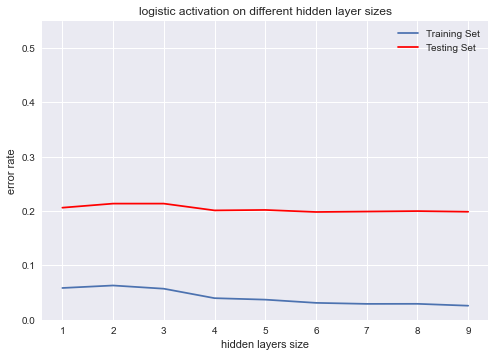

In [80]:
train_score_list=[]
test_score_list=[]
for h in hidden_layers_list:
    mlp = MLPClassifier(hidden_layer_sizes=h,random_state=0, activation='logistic', max_iter=200).fit(x, y_train_df)
    cv_results = cross_validate(mlp, x, y_train_df, cv=5, return_train_score=True)
 #     score = cross_val_score(lr_clf ,x, y_train_df, cv=5).mean()
    train_score_list.append(cv_results['train_score'].mean())
    test_score_list.append(cv_results['test_score'].mean())
train_error_list = 1 - np.array(train_score_list)
test_error_list = 1 - np.array(test_score_list)

plt.plot(hidden_layers_list, train_error_list, label='Training Set')
plt.plot(hidden_layers_list, test_error_list, label='Testing Set', color='red')
plt.xlabel('hidden layers size')
plt.ylabel('error rate')
plt.title('logistic activation on different hidden layer sizes')
plt.ylim((0,0.55))
plt.legend()

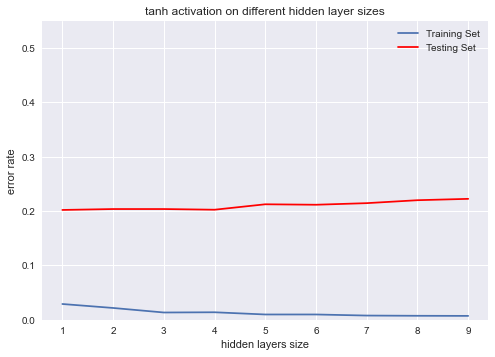

In [81]:
train_score_list=[]
test_score_list=[]
for h in hidden_layers_list:
    mlp = MLPClassifier(hidden_layer_sizes=h,random_state=0, activation='tanh', max_iter=200).fit(x, y_train_df)
    cv_results = cross_validate(mlp, x, y_train_df, cv=5, return_train_score=True)
 #     score = cross_val_score(lr_clf ,x, y_train_df, cv=5).mean()
    train_score_list.append(cv_results['train_score'].mean())
    test_score_list.append(cv_results['test_score'].mean())
train_error_list = 1 - np.array(train_score_list)
test_error_list = 1 - np.array(test_score_list)

plt.plot(hidden_layers_list, train_error_list, label='Training Set')
plt.plot(hidden_layers_list, test_error_list, label='Testing Set', color='red')
plt.xlabel('hidden layers size')
plt.ylabel('error rate')
plt.title('tanh activation on different hidden layer sizes')
plt.ylim((0,0.55))
plt.legend()

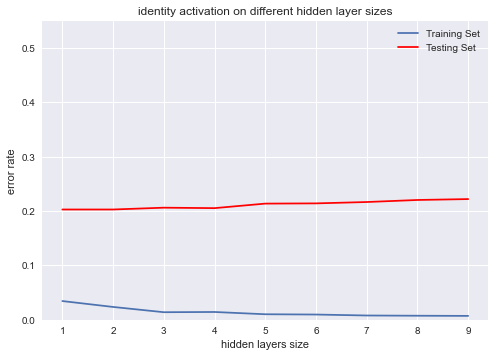

In [82]:
train_score_list=[]
test_score_list=[]
for h in hidden_layers_list:
    mlp = MLPClassifier(hidden_layer_sizes=h,random_state=0, activation='identity', max_iter=200).fit(x, y_train_df)
    cv_results = cross_validate(mlp, x, y_train_df, cv=5, return_train_score=True)
 #     score = cross_val_score(lr_clf ,x, y_train_df, cv=5).mean()
    train_score_list.append(cv_results['train_score'].mean())
    test_score_list.append(cv_results['test_score'].mean())
train_error_list = 1 - np.array(train_score_list)
test_error_list = 1 - np.array(test_score_list)

plt.plot(hidden_layers_list, train_error_list, label='Training Set')
plt.plot(hidden_layers_list, test_error_list, label='Testing Set', color='red')
plt.xlabel('hidden layers size')
plt.ylabel('error rate')
plt.title('identity activation on different hidden layer sizes')
plt.ylim((0,0.55))
plt.legend()

In [83]:
parameters = {'activation':('tanh', 'relu', 'logistic', 'identity'), 'hidden_layer_sizes': hidden_layers_list}
mlp = MLPClassifier()
clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(x, y_train_df)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ('tanh', 'relu', 'logistic', 'identity'),
                         'hidden_layer_sizes': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [84]:
print(clf.best_score_)
print(clf.best_params_)

0.8025
{'activation': 'logistic', 'hidden_layer_sizes': 7}


### SVM

In [85]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# clf = make_pipeline(StandardScaler(with_mean=False), SVC())
clf = SVC(kernel='linear').fit(x_train, y_train)
clf.score(x_test, y_test)

0.8291666666666667

In [90]:
C_grid = np.logspace(-5, 5, 19)
C_grid

array([1.00000000e-05, 3.59381366e-05, 1.29154967e-04, 4.64158883e-04,
       1.66810054e-03, 5.99484250e-03, 2.15443469e-02, 7.74263683e-02,
       2.78255940e-01, 1.00000000e+00, 3.59381366e+00, 1.29154967e+01,
       4.64158883e+01, 1.66810054e+02, 5.99484250e+02, 2.15443469e+03,
       7.74263683e+03, 2.78255940e+04, 1.00000000e+05])

test score: [0.6808333333333334, 0.6808333333333334, 0.6808333333333334, 0.6808333333333334, 0.6808333333333334, 0.6808333333333334, 0.6808333333333334, 0.6933333333333332, 0.8041666666666666, 0.8245833333333333, 0.83125, 0.8291666666666666, 0.8291666666666666, 0.8291666666666666, 0.8291666666666666, 0.8291666666666666, 0.8291666666666666, 0.8291666666666666, 0.8291666666666666]
test error rate: [0.31916667 0.31916667 0.31916667 0.31916667 0.31916667 0.31916667
 0.31916667 0.30666667 0.19583333 0.17541667 0.16875    0.17083333
 0.17083333 0.17083333 0.17083333 0.17083333 0.17083333 0.17083333
 0.17083333]


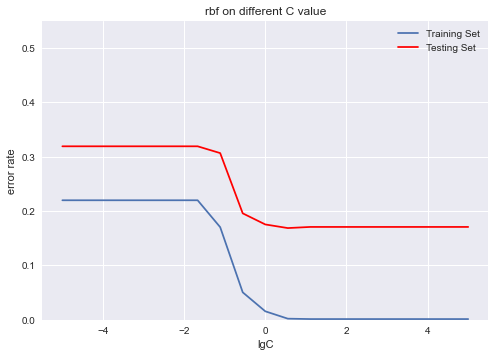

In [86]:
from sklearn.model_selection import cross_validate

C_grid = np.logspace(-5, 5, 19)

train_score_list=[]
test_score_list=[]
for C in C_grid:
    svm_clf = SVC(C=C,random_state=666, kernel='rbf')
    cv_results = cross_validate(svm_clf, x, y_train_df, cv=5, return_train_score=True)
    train_score_list.append(cv_results['train_score'].mean())
    test_score_list.append(cv_results['test_score'].mean())  

train_error_list = 1 - np.array(train_score_list)
test_error_list = 1 - np.array(test_score_list)

lg_C_grid = np.log10(C_grid)
plt.plot(lg_C_grid, train_error_list, label='Training Set')
plt.plot(lg_C_grid, test_error_list, label='Testing Set', color='red')
plt.xlabel('lgC')
plt.ylabel('error rate')
plt.title('rbf on different C value')
plt.ylim((0,0.55))
plt.legend()

print("test score:", test_score_list)
print("test error rate:", test_error_list)

test score: [0.6820833333333334, 0.6820833333333334, 0.6820833333333334, 0.6820833333333334, 0.6820833333333334, 0.6820833333333334, 0.6820833333333334, 0.7887500000000001, 0.8179166666666665, 0.8216666666666667, 0.7970833333333333, 0.7700000000000001, 0.7554166666666666, 0.7454166666666666, 0.7274999999999999, 0.73125, 0.7320833333333334, 0.7383333333333333, 0.7299999999999999]
test error rate: [0.31791667 0.31791667 0.31791667 0.31791667 0.31791667 0.31791667
 0.31791667 0.21125    0.18208333 0.17833333 0.20291667 0.23
 0.24458333 0.25458333 0.2725     0.26875    0.26791667 0.26166667
 0.27      ]


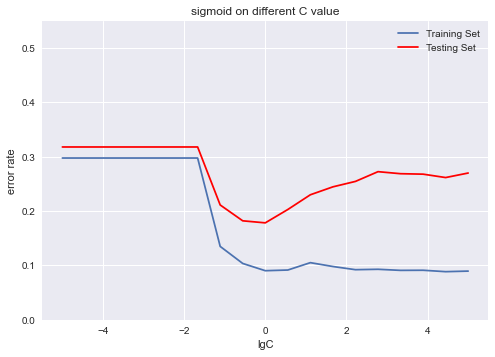

In [87]:
train_score_list=[]
test_score_list=[]
for C in C_grid:
    svm_clf = SVC(C=C,random_state=666, kernel='sigmoid')
    cv_results = cross_validate(svm_clf, x, y_train_df, cv=5, return_train_score=True)
    train_score_list.append(cv_results['train_score'].mean())
    test_score_list.append(cv_results['test_score'].mean())  

train_error_list = 1 - np.array(train_score_list)
test_error_list = 1 - np.array(test_score_list)

lg_C_grid = np.log10(C_grid)
plt.plot(lg_C_grid, train_error_list, label='Training Set')
plt.plot(lg_C_grid, test_error_list, label='Testing Set', color='red')
plt.xlabel('lgC')
plt.ylabel('error rate')
plt.title('sigmoid on different C value')
plt.ylim((0,0.55))
plt.legend()

print("test score:", test_score_list)
print("test error rate:", test_error_list)

test score: [0.63625, 0.63625, 0.63625, 0.63625, 0.63625, 0.63625, 0.63625, 0.63625, 0.70375, 0.7941666666666667, 0.7933333333333332, 0.7925000000000001, 0.7716666666666667, 0.7133333333333333, 0.6245833333333334, 0.6054166666666667, 0.6054166666666667, 0.6054166666666667, 0.6054166666666667]
test error rate: [0.36375    0.36375    0.36375    0.36375    0.36375    0.36375
 0.36375    0.36375    0.29625    0.20583333 0.20666667 0.2075
 0.22833333 0.28666667 0.37541667 0.39458333 0.39458333 0.39458333
 0.39458333]


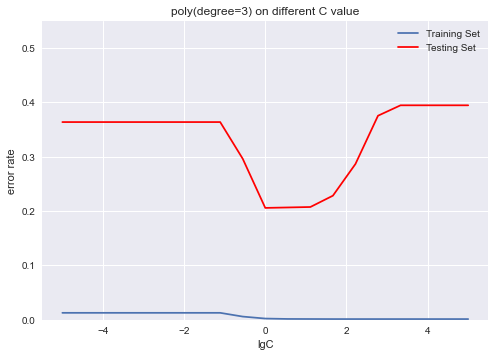

In [88]:
train_score_list=[]
test_score_list=[]
for C in C_grid:
    svm_clf = SVC(C=C,random_state=666, kernel='poly')
    cv_results = cross_validate(svm_clf, x, y_train_df, cv=5, return_train_score=True)
    train_score_list.append(cv_results['train_score'].mean())
    test_score_list.append(cv_results['test_score'].mean())  

train_error_list = 1 - np.array(train_score_list)
test_error_list = 1 - np.array(test_score_list)

lg_C_grid = np.log10(C_grid)
plt.plot(lg_C_grid, train_error_list, label='Training Set')
plt.plot(lg_C_grid, test_error_list, label='Testing Set', color='red')
plt.xlabel('lgC')
plt.ylabel('error rate')
plt.title('poly(degree=3) on different C value')
plt.ylim((0,0.55))
plt.legend()

print("test score:", test_score_list)
print("test error rate:", test_error_list)

test score: [0.8233333333333335, 0.8204166666666666, 0.7941666666666667, 0.76625, 0.7350000000000001, 0.7116666666666667, 0.6725000000000001, 0.6433333333333333, 0.6016666666666666]
test error rate: [0.17666667 0.17958333 0.20583333 0.23375    0.265      0.28833333
 0.3275     0.35666667 0.39833333]


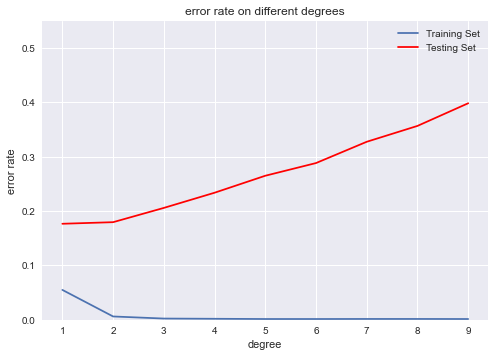

In [89]:
train_score_list=[]
test_score_list=[]
degree_list = np.arange(1,10)
for d in degree_list:
    svm_clf = SVC(C=1,random_state=666, kernel='poly', degree=d)
    cv_results = cross_validate(svm_clf, x, y_train_df, cv=5, return_train_score=True)
    train_score_list.append(cv_results['train_score'].mean())
    test_score_list.append(cv_results['test_score'].mean())  

train_error_list = 1 - np.array(train_score_list)
test_error_list = 1 - np.array(test_score_list)

# lg_C_grid = np.log10(C_grid)
plt.plot(degree_list, train_error_list, label='Training Set')
plt.plot(degree_list, test_error_list, label='Testing Set', color='red')
plt.xlabel('degree')
plt.ylabel('error rate')
plt.title('error rate on different degrees')
plt.ylim((0,0.55))
plt.legend()

print("test score:", test_score_list)
print("test error rate:", test_error_list)

### Hypothesis


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

import random
random.seed(0)

test_index = random.sample(range(2400),960)
train_index = [i for i in list(range(2400)) if i not in test_index]

x_train = x[train_index]
x_test = x[test_index]
y_train = y_train_df['is_positive_sentiment'][train_index]
y_test = y_train_df['is_positive_sentiment'][test_index]

In [92]:
df = pd.concat([x_train_df, y_train_df], axis=1)

In [94]:
svm_clf = SVC(C=3.6,random_state=666, kernel='rbf').fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)
svm_clf.score(x_test, y_test)

0.828125

In [95]:
df_wrong = pd.DataFrame(y_pred != y_test)
df_wrong[df_wrong['is_positive_sentiment']==True].index
wrong_classify = df.iloc[df_wrong[df_wrong['is_positive_sentiment']==True].index]

In [96]:
wrong_classify.shape

(165, 3)

In [107]:
wrong_classify[wrong_classify['website_name'] == 'amazon'].shape
print(wrong_classify[wrong_classify['website_name'] == 'amazon'].to_string())

    website_name                                                                                                                                                  text  is_positive_sentiment
302       amazon                                                  i ordered this for sony ericsson w810i but i think it only worked once (thats when i first used it).                      0
255       amazon                                      the sound quality for the device is unacceptable.unless you are in a really quiet area, you almost hear nothing.                      0
753       amazon                                                            i usually don't like headbands but this one is very lightweight & doesn't mess up my hair.                      1
367       amazon                                                                                                                same problem as others have mentioned.                      0
533       amazon                                  

In [108]:
wrong_classify[wrong_classify['website_name'] == 'imdb'].shape
print(wrong_classify[wrong_classify['website_name'] == 'imdb'].to_string())

     website_name                                                                                                                                                                                                                                                   text  is_positive_sentiment
1060         imdb                                                                                                                                                                                                                         lots of holes in the script.                        0
1242         imdb                                                                                                                                                          however paul schrader has indeed made a film "about" mishima that is both superb & complex.                        1
1295         imdb                                                                                                                       

In [111]:
yelp_wrong = wrong_classify[wrong_classify['website_name'] == 'yelp']
yelp_wrong.shape
print(yelp_wrong.to_string())

     website_name                                                                                                                                            text  is_positive_sentiment
1990         yelp                                                                                                                and the drinks are weak, people!                      0
2263         yelp                             some may say this buffet is pricey but i think you get what you pay for and this place you are getting quite a lot!                      1
2135         yelp                                                                                                      never had anything to complain about here.                      1
2324         yelp                                                                                                      all in all, i can assure you i'll be back.                      1
1786         yelp                                                          

### Leaderboard

In [113]:
svm_clf = SVC(C=3.6,random_state=666, kernel='rbf', probability=True).fit(x, y_train_df)
y_sub = svm_clf.predict_proba(X[-600:,:])

In [114]:
np.savetxt('yproba1_test.txt', y_sub[:,1])